# Preface

Objectives:
1. Learn to use the `keras` API
2. Explore how performance of fully connected neural networks depend on its hyper-parameters
3. Explore the effect of learning rate and batch size on training and testing performance

Due: 4 Feb 2022

In [1]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(font_scale=1.5)
import datetime, os, itertools
import numpy as np


# Setting random seed for reproducibility
randomseed=69
from tensorflow.random import set_seed
set_seed(randomseed)

C:\Users\Gary2\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# The Fashion MNIST Dataset

As mentioned in class the saying,
> *If you model works for MNIST, it may not work for anything else, but if it doesn't work for MNIST, it won't work for anything else*

Here in this notebook you will go beyond the MNIST dataset, albeit only a little bit. We will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which is designed to replace MNIST as the new minimal dataset to test vision tasks. 

It is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Thus, it is almost exactly like the MNIST dataset for digit recognition, but the classification problem is generally harder.


Here are some example images:
![Fashion MNIST](https://markusthill.github.io/images/2017-10-12-zalandos-fashion-mnist-dataset/zalando10x10.jpeg)

# Importing the Dataset

Just like MNIST, this dataset is found in the `tf.keras.datasets` module.

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [14]:
x_train.shape

(60000, 28, 28)

In [16]:
y_train.shape

(60000,)

The following is a dictionary of labels that will map the y_train/y_test labels into words

In [6]:
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}
labels_train = [label_dict[u] for u in y_train]
labels_test = [label_dict[u] for u in y_test]

Text(0.5, 1.0, 'Label = Ankle boot')

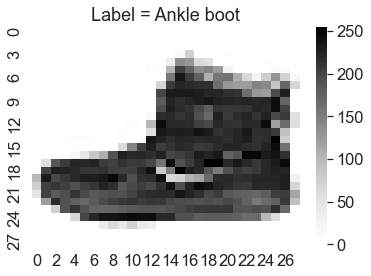

In [7]:
ax = sns.heatmap(x_train[0], cmap='Greys')
ax.set_title(f'Label = {labels_train[0]}')

# Task 1: Build a Shallow NN for Classification

Build and train a shallow (one-hidden-layer) neural network with 128 hidden nodes to classify these images. Remember to perform appropriate preprocessing steps, such as normalization and one-hot representations.

Evaluate carefully the performance of your training and the final model's performance. Discuss any interesting phenomena you discover.

In [8]:
# Before we do anything we would want to normalize pixel values between 0&1
# for both train and test data, divide by 255 pixels.


x_train_sc = x_train.astype('float32')/255.0
x_test_sc = x_test.astype('float32')/255.0

In [9]:
from keras import Sequential
from keras.models import load_model
from keras.layers import Dense, Flatten
from keras.losses import categorical_crossentropy, SparseCategoricalCrossentropy


In [10]:
# convert label data into one hot representations
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
y_train.shape

(60000, 10)

### Building a simple neural network with 128 units
Make use of Flatten to change input data matrix from [num_samples, 28, 28]  →  [num_samples, 784]

In [8]:
shallow_nn = Sequential()
shallow_nn.add(Flatten(input_shape=(x_train_sc.shape[1],x_train_sc.shape[2])))

# specify 128 units for shallow neural network, with ReLu activation function
shallow_nn.add(Dense(units=128, activation='relu'))

# Final output layer units should match number of classes, which is at 10.
shallow_nn.add(Dense(units=10, activation='softmax'))

# compile model, with optimizer as SGD and loss as categorical crossentropy as loss
shallow_nn.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])

# Define EarlyStopping call back, when the monitored metric has stopped improving significantly.
# call back stops training when there is no improvement in loss for 5 consecutive epochs.
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

shallow_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
# use the training data to specify a validation split of 20%, 80% used for training each model.
history = shallow_nn.fit(x=x_train_sc,
                    y=y_train,
                    epochs=200, # how many times you go through the entire data set.
                    batch_size=32, # use batch size of 32 for stochastic gradient descent.
                    validation_split=0.2,
                    verbose=2,
                    callbacks = [callback]
                        )

Epoch 1/200
1500/1500 - 3s - loss: 0.5607 - accuracy: 0.8004 - val_loss: 0.4441 - val_accuracy: 0.8399
Epoch 2/200
1500/1500 - 2s - loss: 0.4115 - accuracy: 0.8514 - val_loss: 0.4044 - val_accuracy: 0.8540
Epoch 3/200
1500/1500 - 2s - loss: 0.3729 - accuracy: 0.8630 - val_loss: 0.3707 - val_accuracy: 0.8679
Epoch 4/200
1500/1500 - 2s - loss: 0.3458 - accuracy: 0.8722 - val_loss: 0.3661 - val_accuracy: 0.8646
Epoch 5/200
1500/1500 - 2s - loss: 0.3258 - accuracy: 0.8795 - val_loss: 0.3405 - val_accuracy: 0.8761
Epoch 6/200
1500/1500 - 2s - loss: 0.3123 - accuracy: 0.8841 - val_loss: 0.3488 - val_accuracy: 0.8755
Epoch 7/200
1500/1500 - 2s - loss: 0.2979 - accuracy: 0.8905 - val_loss: 0.3519 - val_accuracy: 0.8722
Epoch 8/200
1500/1500 - 2s - loss: 0.2884 - accuracy: 0.8934 - val_loss: 0.3375 - val_accuracy: 0.8783
Epoch 9/200
1500/1500 - 2s - loss: 0.2771 - accuracy: 0.8980 - val_loss: 0.3259 - val_accuracy: 0.8839
Epoch 10/200
1500/1500 - 2s - loss: 0.2687 - accuracy: 0.8995 - val_loss:

From the above, we can note that the training stopped after 21 epochs, whereby there was no improvement in the monitored val_loss value.

We do not want the model to overfit on the training data, hence the monitoring val_accuracy is best for observing generalization capabilities of the NN.

Let us now examine the training curves to see how we fare with a shallow neural network.

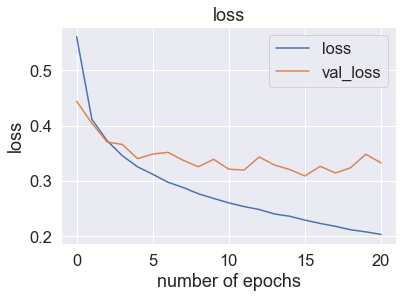

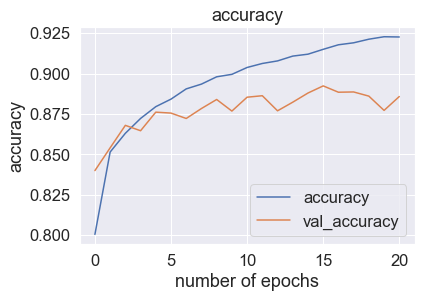

In [10]:
import pandas as pd
history_df = pd.DataFrame(history.history)

ax1 = history_df.plot(y=['loss','val_loss'], title='loss')
ax1.set_xlabel('number of epochs')
ax1.set_ylabel('loss')
ax1.locator_params(integer=True)
ax2 = history_df.plot(y=['accuracy','val_accuracy'], title='accuracy')
ax2.set_xlabel('number of epochs')
ax2.set_ylabel('accuracy')
ax2.locator_params(integer=True)


From the graphs above, we can see that for the first graph for losses, we can compare the training loss and the validation loss curves.

We can see that with larger number of epochs, we are able to see that the training loss steadily decreases, whereas the validation loss on unseen data decreases initially, before stagnating. This is a case of overfitting of the shallow neural network on the training data, whereby the model is memorizing the data and loses its generalization capability on unseen test data.

In the accuracy plot, we can see the the training accuracy is very high which is expected, but the validation accuracy on unseen test data remains significantly lower, which justifies the overfitting model.


We are also able to find the number of epochs with the best validation performance for the trial.

In [11]:
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print(f'Best epoch: {best_epoch}')
print(f'Highest validation accuracy: {max(val_acc_per_epoch):.3f}')

Best epoch: 16
Highest validation accuracy: 0.892


Summary of results - evaluating on unseen test data

In [12]:
eval_result = shallow_nn.evaluate(x_test_sc, y_test)
print(f'Test loss: {eval_result[0]:.3f}')
print(f'Test accuracy: {eval_result[1]:.3f}')

313/313 [==============================] - 1s 1ms/step - loss: 0.3638 - accuracy: 0.8792
Test loss: 0.364
Test accuracy: 0.879


From the above, we can see that the shallow neural network has a test accuracy of about 0.879, which is quite comparable to the highest obtained validation accuracy at about 0.892. Let us see if we can do better by increasing test accuracy by specifying more tunable knows in hyper parameter tuning. For this purpose, we will make use of Keras Tuner library to tune hyperparameters in question.

## Visualization of predictions on test data (predicted label) versus actual label

In [15]:
# define image plotting function for visualization
def plot_images(x, labels=None, nrow=2, ncol=4, im_type='image'):
    fig, ax = plt.subplots(nrow, ncol, figsize=(5*ncol, 4*nrow))
    num_samples = x.shape[0]
    for a in ax.ravel():
        j = np.random.choice(num_samples)
        sns.heatmap(x[j, :, :], ax=a, cbar=False, cmap='gray_r')
        if labels is not None:
            a.set_title(labels[j])
        a.set_xticks([])
        a.set_yticks([])


In [16]:
y_hat_test = shallow_nn.predict(x_test_sc)
correct = y_hat_test.argmax(axis=1) == y_test.argmax(axis=1)
labels = [
    f'Correct: {c} \n Actual: {label_dict[y]} | Predicted: {label_dict[yh]}'
    for c, y, yh in zip(correct, y_test.argmax(axis=1), y_hat_test.argmax(axis=1))
]



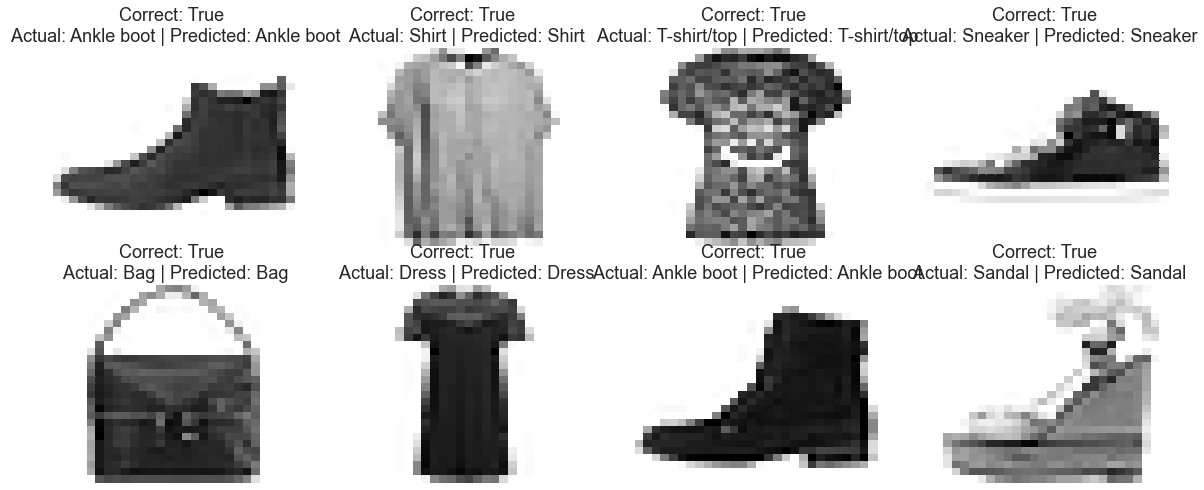

In [17]:
plot_images(x_test_sc, labels=labels)

# Task 2: Dependence on Hyper-parameters

Now, investigate the dependence of the neural network's performance on some hyper-parameters. In particular, you should investigate the dependence on the following:

1. Number of hidden nodes
2. The activation function
3. Loss functions

Discuss any interesting findings and insights.


Workflow:
- Make use of KerasTuner library to specify hyperparameters for learning rate and n for neural networks to automate cross validation across different varied parameters: number of units in shallow NN, activation function, and types of loss function 
- SGD vary with learning rate, together with keras.optimizers.schedules.ExponentialDecay() on the learning rate (since it is often useful to lower the learning rate as the training progresses for convergence.)
- Viz with TensorBoard notebook extension for training progress.


Hyperparameters to vary:
- hidden nodes, vary from a total of 32-256 with a step of 32.
- different activation functions to use: relu, sigmoid, tanh.
- probabilistic loss functions to try: categorical_crossentropy and poisson

In [18]:
import keras_tuner as kt
# Load TensorBoard notebook extension
from tensorboard import notebook
%load_ext tensorboard

In [19]:
# Defined a model builder function to include hyperparameter in a list

runmode = 0

def model_builder(hp):
    """
    Build model for hyperparameter tuning
    hp: HyperParameters class instance
    """
    model = Sequential()
    model.add(Flatten(input_shape=(x_train_sc.shape[1],x_train_sc.shape[1])))
    
    # First hyperparameter to tune - units of dense layer in shallow NN
    hp_units = hp.Int(
        name = 'units of NN',
        min_value = 32,
        max_value = 256,
        step = 64
    )
    
    # Second hyperparameter to tune - activation function of dense layer in shallow NN
    hp_activation = hp.Choice(
        name = 'activation of Dense',
        values = ['relu', 'tanh', 'sigmoid'],
        default = 'relu'
    )
    
    
    model.add(Dense(units=hp_units, activation=hp_activation))
    # Final output layer dimension should match the number of classes, which is at 10.
    model.add(Dense(units=y_test.shape[1], activation='softmax'))
    
    
    # Third hyperparameter to tune - learning rate of SGD / ADAM.
    hp_learning_rate = hp.Choice(
        name = 'learning rate of NN',
        values = [0.01, 0.001],
    )
    
    # Implement a learning rate schedule, with exponential decay. During training of
    # a model, it is useful to lower learning rate as training progresses to help
    # the network converge to local minimum and avoid oscillation.
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate = hp_learning_rate,
        decay_steps = 10000,
        decay_rate = 0.9
    )
    
    optimizers_list = [keras.optimizers.Adam(learning_rate=lr_schedule)]
    
    
    # Fourth hyperparameter to tune: type of loss function to be used - categorical_crossentropy and Poisson.
    # since one-hot representations of the labels are used, categorical_crossentropy should be used.
    hp_loss_func = hp.Choice(
        name = 'loss function of NN',
        values = ['categorical_crossentropy', 'poisson']
    )
    
    model.compile(loss=hp_loss_func, optimizer=optimizers_list[runmode], metrics=['accuracy'])
    
    return model
        
    
    
    
    

# Instantiate the tuner and perform hyperparameter tuning - using HyperBand

#### Hyperband is an optimized version of RandomSearch in terms of search time and resources allocation.

The algorithm trains a large number of models for a few epochs and carries forward only the top-performing half of models to the next round. Hyperband determines the number of models to train in a bracket by computing 1 + logfactor(max_epochs) and rounding it up to the nearest integer.

In [20]:
tuner = kt.Hyperband(
    hypermodel = model_builder,
    objective = 'val_accuracy',
    max_epochs = 20,
    factor = 3,
    directory = 'C:/Users/Gary2/Desktop/NUS MSc DSML Materials/Y1S2/DSA5204/Homework',
    project_name = 'hw1_model'
)

INFO:tensorflow:Reloading Oracle from existing project C:/Users/Gary2/Desktop/NUS MSc DSML Materials/Y1S2/DSA5204/Homework\hw1_model\oracle.json
INFO:tensorflow:Reloading Tuner from C:/Users/Gary2/Desktop/NUS MSc DSML Materials/Y1S2/DSA5204/Homework\hw1_model\tuner0.json


## Code for visualization on confusion matrix in TensorBoard

Confusion matrix gives detailed knowledge of how the classifier (shallow-NN) is performing on validation data during hyperparameter tuning. We make use of Keras LambdaCallback to log the confusion matrix at the end of every epoch.

In [21]:
# Create a TensorBoard callback
logdir = os.path.join('logs', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


## Running the hyperparameter search

In [22]:
# using a 80% training - 20% validation data split.
# tuner.search(x_train_sc, y_train, epochs=50, validation_split=0.2, callbacks = [tensorboard_callback, stop_early], verbose=1)
tuner.search(x_train_sc, y_train, epochs=50, validation_split=0.2, callbacks = [tensorboard_callback], verbose=1)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]



INFO:tensorflow:Oracle triggered exit


In [23]:
# Viewing top 10 results and parameters of hyperparameter tuning.
tuner.results_summary()

Results summary
Results in C:/Users/Gary2/Desktop/NUS MSc DSML Materials/Y1S2/DSA5204/Homework\hw1_model
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units of NN: 160
activation of Dense: sigmoid
learning rate of NN: 0.001
loss function of NN: poisson
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8958333134651184
Trial summary
Hyperparameters:
units of NN: 224
activation of Dense: tanh
learning rate of NN: 0.001
loss function of NN: poisson
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8950833082199097
Trial summary
Hyperparameters:
units of NN: 96
activation of Dense: tanh
learning rate of NN: 0.001
loss function of NN: categorical_crossentropy
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8911666870117188
Trial summary
Hyperparameters:
units of NN: 224
activation of Dense: relu
learning rate of NN: 0.001
loss function of NN:

In [24]:
print(f"""
The hyperparameter search is complete.
The optimal values are stated below:
- Optimal number of hidden nodes in the first densely-connected layer is {best_hps.get('units of NN')}.
- Optimal activation fuction in first dense layer is {best_hps.get('activation of Dense')}.
- Optimal learning rate for the optimizer is {best_hps.get('learning rate of NN')}.
- Optimal loss function for optimizer is {best_hps.get('loss function of NN')}
""")


The hyperparameter search is complete.
The optimal values are stated below:
- Optimal number of hidden nodes in the first densely-connected layer is 160.
- Optimal activation fuction in first dense layer is sigmoid.
- Optimal learning rate for the optimizer is 0.001.
- Optimal loss function for optimizer is poisson



In [25]:
# Visualize plots with TensorBoard
# %tensorboard --logdir logs  --host localhost
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir logs (started 2 days, 20:42:51 ago; port 6006, pid 23700).


From the results from tensorboard 'HPARAMS' tab, we are able to look at the parallel coordinates view. 

From this we can draw a few interesting insights from the hyperparameter tuning:
- A smaller learning rate tends to lead to higher validation accuracy for each epoch, hence it is desired. The learning rate is what is being used to update the weights of the network with respect to the loss gradient. It affects how fast our model can converge to a local minima, smaller learning rate leads to less fluctuations in ADAM algorithm convergence.
- The larger number of units for the first hidden layer, the higher the validation accuracy. We can see from the results below that the ideal number of units in the first layer is about 160 units or 224 units. 
- We may observe that the preferred choice of loss function for the neural network is poisson as opposed to categorical crossentropy as it gives higher validation accuracy for this case.
- Activation layer of dense layer for shallow neural network shows no preference for tanh or relu function, as they all appear in the top 5 highest validation epoch accuracy.
- For the loss function selection, we can see that althoguh categorical_crossentropy loss function handles one-hot encoded label data, we can see that poisson loss function for the optimizers leads to highest validation accuracy.

![alt text](https://user-images.githubusercontent.com/63240580/152123483-5ddea2bc-7dc1-4d2f-865c-28323fd6d509.PNG)

![alt_text](https://user-images.githubusercontent.com/63240580/152124302-93b28b67-17ee-4d1a-8aee-afb032dc8934.PNG)

### Plotting the training and validation curves

We need to check whether the training and validation curves are running closely to one another, so as to conclude that the model is not overfitting.

Utilizing the training log id from TensorBoard, we are able to observe the curves for train and validation
- Red - Training curve for best performing hyperparameter curve
- Blue - Validation curve for best performing hyperparameter curve

![alt_text](https://user-images.githubusercontent.com/63240580/152126961-4805789e-e195-46aa-881a-d3a5af22e477.PNG)

![train vs validation curve for hparam tuning for epoch loss](https://user-images.githubusercontent.com/63240580/152127778-8f408ac5-dfd2-4a68-afc2-9fa77a6657fd.PNG)

From the above, we are able to tell that the validation curve is still running slightly different from the training curve. There is still some form of overfitting, however, there is a smaller degree of overfitting as evidenced through similarity in loss and the degree of difference in this curve and the curve seen in part 1.

In [26]:
# Train the model
# find the optimal number of epochs to train the model with hyperparameters obtained from the search

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train_sc, y_train, epochs=50, validation_split=0.2)

# We want to determine the best epoch so as to ensure no overfitting for the model
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1555 - accuracy: 0.8115 - val_loss: 0.1444 - val_accuracy: 0.8443
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1403 - accuracy: 0.8550 - val_loss: 0.1387 - val_accuracy: 0.8579
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1363 - accuracy: 0.8676 - val_loss: 0.1363 - val_accuracy: 0.8691
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1337 - accuracy: 0.8780 - val_loss: 0.1350 - val_accuracy: 0.8719
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1319 - accuracy: 0.8846 - val_loss: 0.1333 - val_accuracy: 0.8795
Epoch 6/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1302 - accuracy: 0.8908 - val_loss: 0.1322 - val_accuracy: 0.8828
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1288 - accuracy: 0.8933 - val_loss: 0.1313 - val_accuracy:

In [27]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model with best epochs
hypermodel.fit(x_train_sc, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/46
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1553 - accuracy: 0.8091 - val_loss: 0.1448 - val_accuracy: 0.8384
Epoch 2/46
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1402 - accuracy: 0.8553 - val_loss: 0.1389 - val_accuracy: 0.8572
Epoch 3/46
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1363 - accuracy: 0.8673 - val_loss: 0.1366 - val_accuracy: 0.8677
Epoch 4/46
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1339 - accuracy: 0.8770 - val_loss: 0.1353 - val_accuracy: 0.8712
Epoch 5/46
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1320 - accuracy: 0.8828 - val_loss: 0.1333 - val_accuracy: 0.8811
Epoch 6/46
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1304 - accuracy: 0.8887 - val_loss: 0.1325 - val_accuracy: 0.8813
Epoch 7/46
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1290 - accuracy: 0.8930 - val_loss: 0.1316 - val_accuracy:

In [38]:
# Evaluate hypermodel on the unseen test data

eval_result = hypermodel.evaluate(x_test_sc, y_test)
print(f"Test Loss: {eval_result[0]:.3f}\n Test Accuracy: {eval_result[1]:.3f}")

313/313 [==============================] - 0s 1ms/step - loss: 0.1367 - accuracy: 0.8886
Test Loss: 0.137
 Test Accuracy: 0.889


## Plotting confusion matrix for our trained model with best epochs and hyperparameters

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
# Make Visualizations better for confusion matrix
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

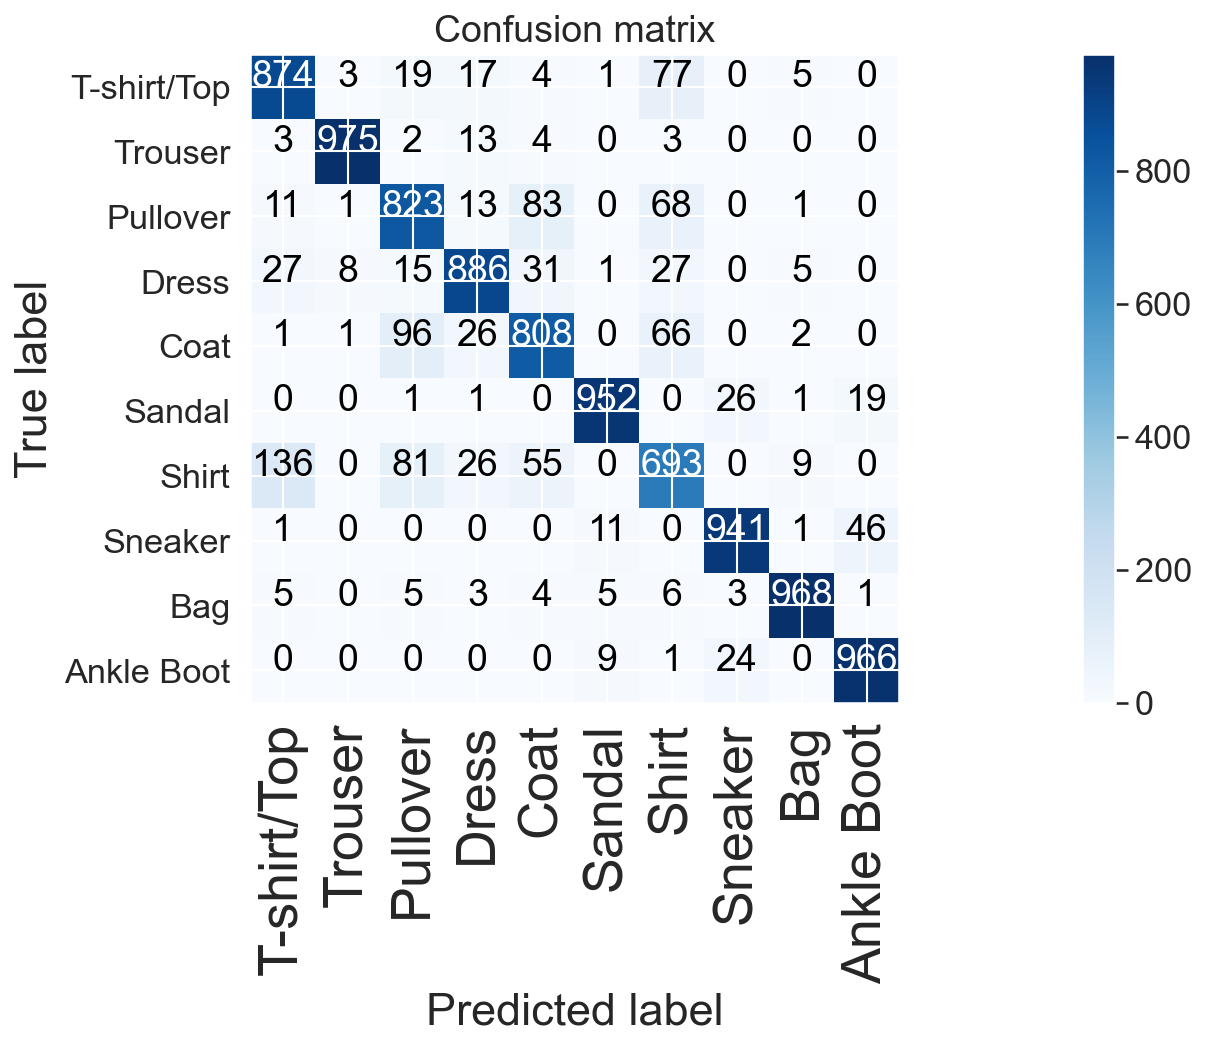

In [33]:
# Predict the values from the validation dataset
Y_pred = hypermodel.predict(x_test_sc)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

From the above, we are able to see that a larger number of T-Shirt/Top are misclassified as Shirt, and vice versa. In addition, we can see a large number of coat are misclassified as Pullover. 

## Visualization of trained model with best hyperparameters with images, comparison between predicted label and actual label

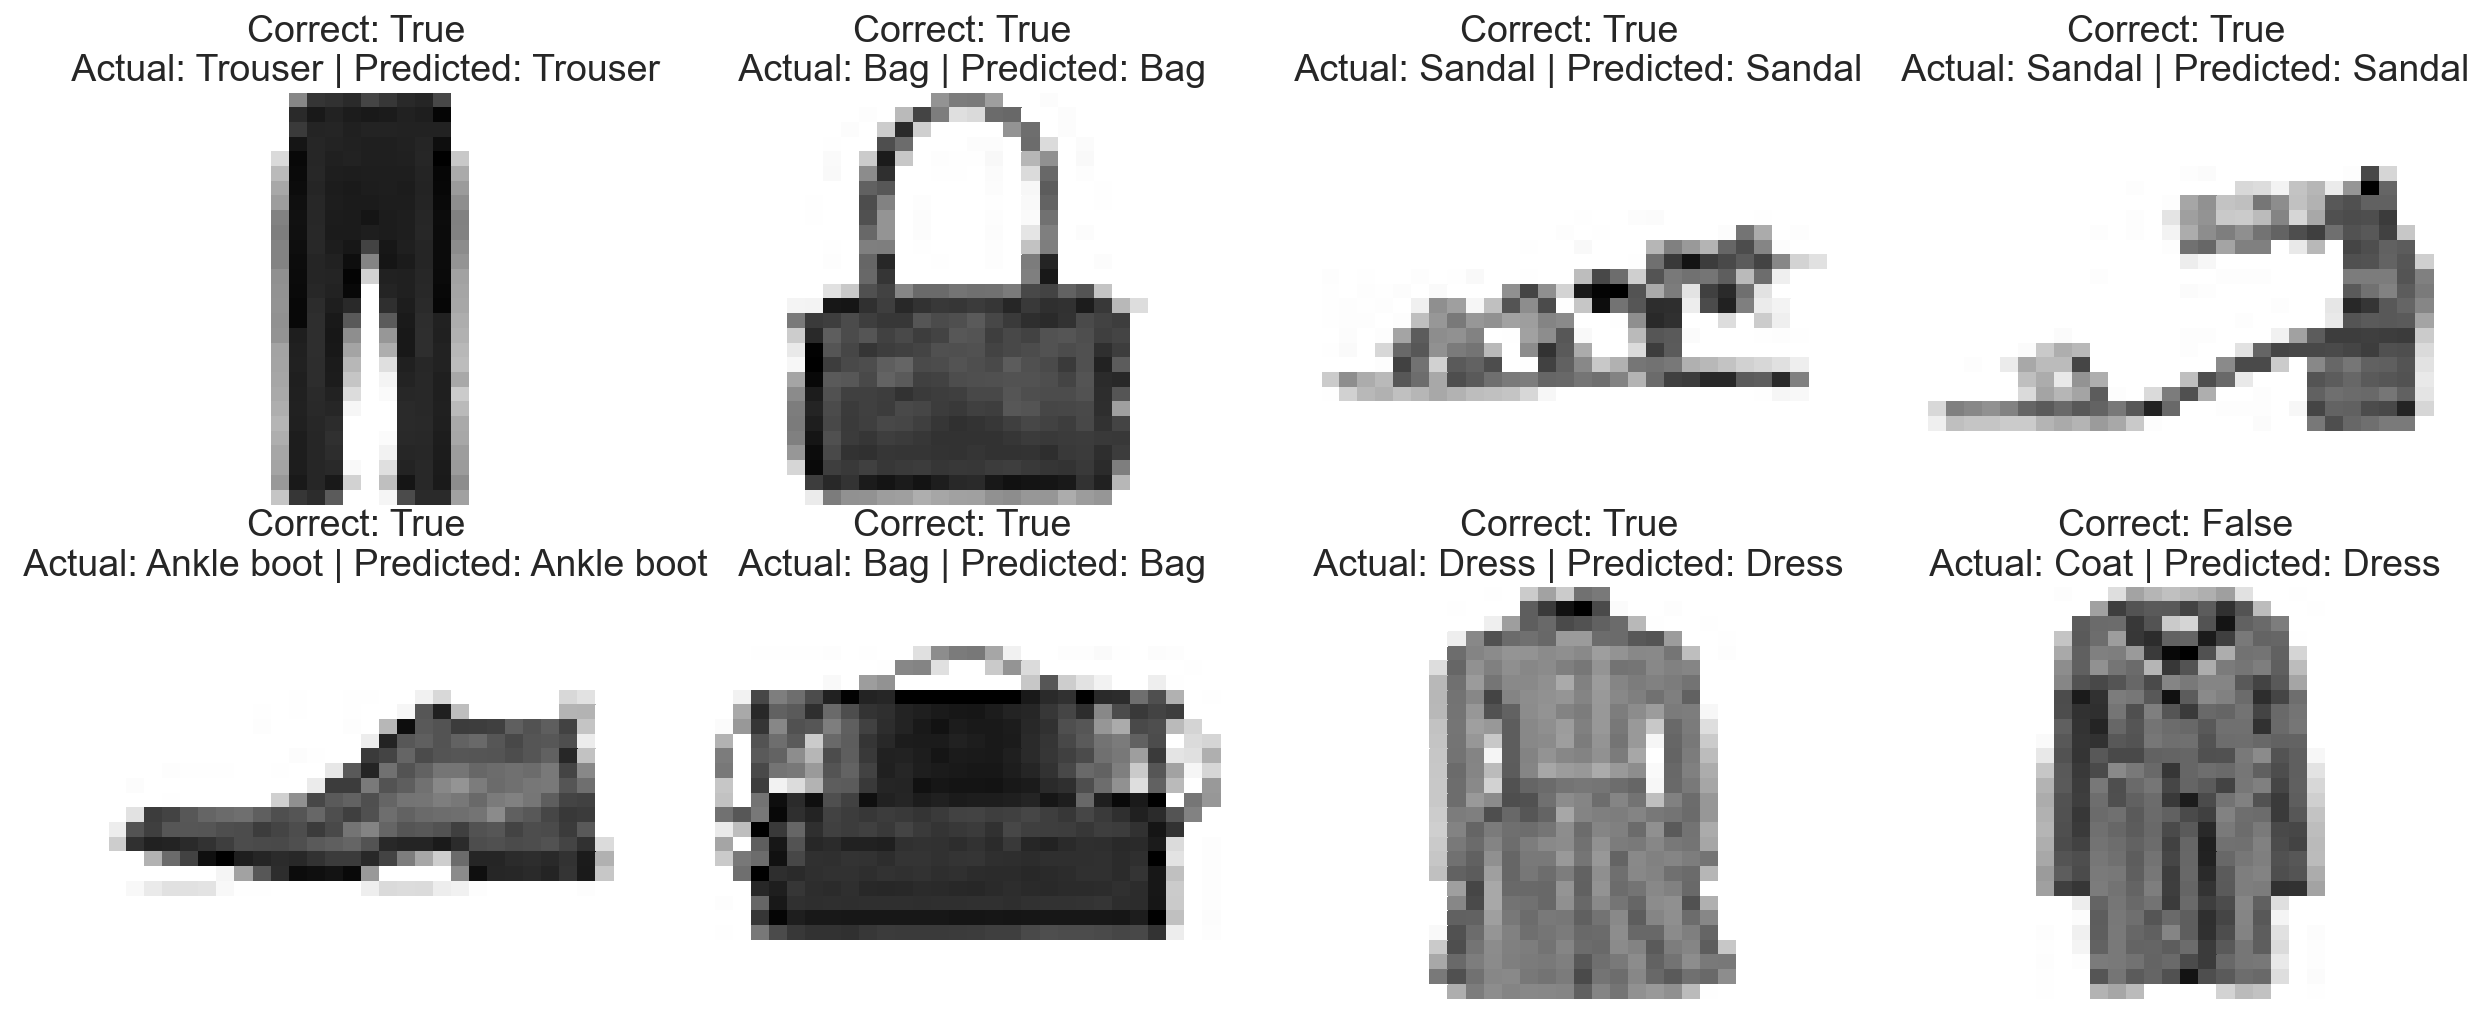

In [34]:
y_hat_test = hypermodel.predict(x_test_sc)
correct = y_hat_test.argmax(axis=1) == y_test.argmax(axis=1)
labels = [
    f'Correct: {c} \n Actual: {label_dict[y]} | Predicted: {label_dict[yh]}'
    for c, y, yh in zip(correct, y_test.argmax(axis=1), y_hat_test.argmax(axis=1))
]

plot_images(x_test_sc, labels=labels)

# Further improvements

We can see that our best accuracy for our shallow-NN with best hyperparameters and best epochs have a test accuracy of about 88.9%. Before hyperparameter tuning, there was a test accuracy of about 87.9%. Hence the hyperparameter tuning resulted in an improvement of about 1.0% for our model.

We can improve this score by implementing more layers for a deep NN or exploring other networks that have better image classification capabilities such as the convolutional neural networks (CNN).

# END